In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create an engine to connect to the SQLite database
engine = create_engine(r"sqlite:///C:\Users\zarap\OneDrive\UofT BootCamp\Class Project\sqlalchemy-challenge\SurfsUp\Resources\hawaii.sqlite")

# Reflect the existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session to link Python to the database
session = Session(engine)


C:\Users\zarap\AppData\Local\Temp\ipykernel_26304\1732564755.py:17: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [2]:
# Query for the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"Most recent date in the dataset: {most_recent_date}")


Most recent date in the dataset: 2017-08-23


In [3]:
# Query to get date and precipitation data for the last year
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()


In [29]:
# Convert the query results into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [9]:
# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values('date')

In [12]:
# Convert 'date' column to datetime format for better plotting
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])



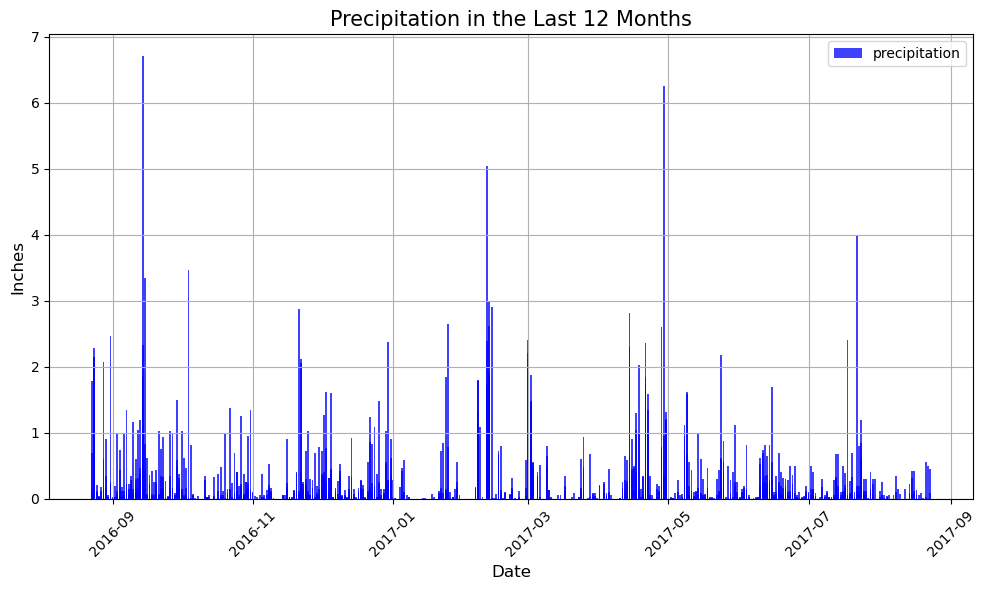

In [16]:
# Plotting the precipitation data
plt.figure(figsize=(10,6))
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], color='blue', alpha=0.75, label='precipitation')

# Adding labels and title
plt.title("Precipitation in the Last 12 Months", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Inches", fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid()

# Show the plot with legend
plt.legend()
plt.tight_layout()
plt.show()



In [17]:

# Summary statistics for the precipitation data
precipitation_df.describe()

,date,precipitation
count,2230,2021.000000
mean,2017-02-16 05:31:15.874439424,0.177279
min,2016-08-23 00:00:00,0.000000
25%,2016-11-18 00:00:00,0.000000
50%,2017-02-14 12:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.461190


In [18]:
# Query to find the number of stations
num_stations = session.query(func.count(Station.station)).scalar()
print(f"Number of stations: {num_stations}")

Number of stations: 9


In [19]:
# Query to list the stations and observation counts, and find the most active station
active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active_station = active_stations[0][0]  # Most active station
print(f"Most active station: {most_active_station}")


Most active station: USC00519281


In [20]:

# Query to find the min, max, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Temperature stats (min, avg, max): {temperature_stats}")


Temperature stats (min, avg, max): [(54.0, 71.66378066378067, 85.0)]


In [25]:

# Query to get the last 12 months of temperature observation data for the most active station
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= '2016-08-23').all()
tobs_data

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [26]:

# Convert the results into a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['tobs'])
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<Axes: title={'center': 'Temperature Observations for the Most Active Station'}, ylabel='Frequency'>

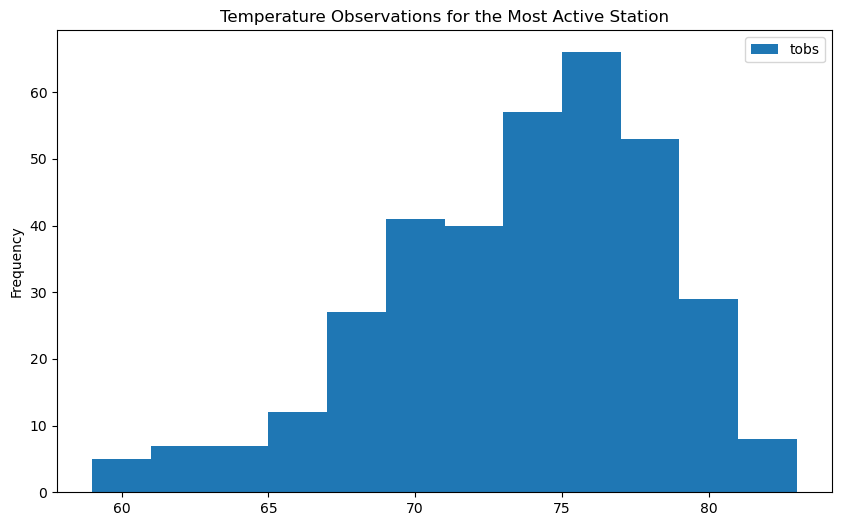

In [27]:

# Plot the temperature observations as a histogram
tobs_df.plot.hist(bins=12, figsize=(10,6), title="Temperature Observations for the Most Active Station")


In [28]:
# Close the session
session.close()
